In [1]:
from perceptron import Perceptron
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

column_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

data = pd.read_csv(url, header=None, names=column_names)

# throw away the species column of virginica
data = data[data['Species'] != 'Iris-virginica']

print(data)

    Sepal Length  Sepal Width  Petal Length  Petal Width          Species
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


In [17]:
# choose the first two features and the last column
X = data[['Sepal Length', 'Petal Length']].values
y = data['Species'].apply(lambda x: 1 if x == 'Iris-setosa' else -1).values

# split the data into training and test sets
X_train, X_test, y_train, y_test = X, X, y, y

# initialize the perceptron
clf = Perceptron(eta=0.0001, n_iter=50, random_state=42)
clf.fit(X_train, y_train)

# predict the test set
y_pred = clf.predict(X_test)

# compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Epoch 1/50, Errors: 3
Epoch 2/50, Errors: 6
Epoch 3/50, Errors: 5
Epoch 4/50, Errors: 3
Epoch 5/50, Errors: 3
Epoch 6/50, Errors: 2
Epoch 7/50, Errors: 3
Epoch 8/50, Errors: 2
Epoch 9/50, Errors: 3
Epoch 10/50, Errors: 2
Epoch 11/50, Errors: 3
Epoch 12/50, Errors: 2
Epoch 13/50, Errors: 1
Epoch 14/50, Errors: 0
Epoch 15/50, Errors: 0
Epoch 16/50, Errors: 0
Epoch 17/50, Errors: 0
Epoch 18/50, Errors: 0
Epoch 19/50, Errors: 0
Epoch 20/50, Errors: 0
Epoch 21/50, Errors: 0
Epoch 22/50, Errors: 0
Epoch 23/50, Errors: 0
Epoch 24/50, Errors: 0
Epoch 25/50, Errors: 0
Epoch 26/50, Errors: 0
Epoch 27/50, Errors: 0
Epoch 28/50, Errors: 0
Epoch 29/50, Errors: 0
Epoch 30/50, Errors: 0
Epoch 31/50, Errors: 0
Epoch 32/50, Errors: 0
Epoch 33/50, Errors: 0
Epoch 34/50, Errors: 0
Epoch 35/50, Errors: 0
Epoch 36/50, Errors: 0
Epoch 37/50, Errors: 0
Epoch 38/50, Errors: 0
Epoch 39/50, Errors: 0
Epoch 40/50, Errors: 0
Epoch 41/50, Errors: 0
Epoch 42/50, Errors: 0
Epoch 43/50, Errors: 0
Epoch 44/50, Errors:

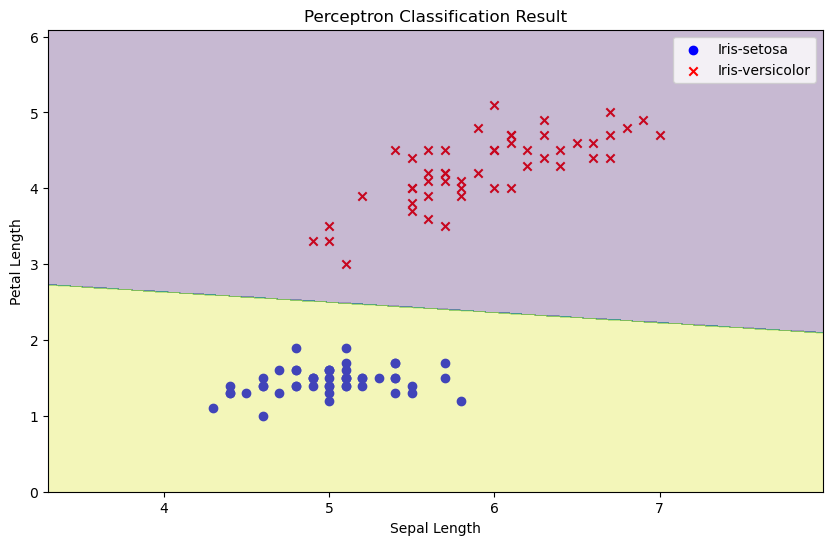

In [19]:
# draw the classification result
plt.figure(figsize=(10, 6))

# select setosa and versicolor
setosa = y == 1
versicolor = y == -1

plt.scatter(X[setosa, 0], X[setosa, 1], c='blue', marker='o', label='Iris-setosa')
plt.scatter(X[versicolor, 0], X[versicolor, 1], c='red', marker='x', label='Iris-versicolor')

# draw the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# set labels
plt.title('Perceptron Classification Result')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()